<a href="https://colab.research.google.com/github/kbadigan/kbadigan_Advanced_Machine_Learning/blob/main/Imdb_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The IMDB Implementation

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

In [ ]:
train_labels[0]

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model

### Validating your approach

**Setting aside a validation set**

In [ ]:
import random
random.seed(10)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 4s 128ms/step - loss: 0.1564 - accuracy: 0.9517 - val_loss: 0.2791 - val_accuracy: 0.8853
Epoch 2/4
30/30 [==============================] - 2s 83ms/step - loss: 0.1428 - accuracy: 0.9561 - val_loss: 0.2819 - val_accuracy: 0.8862
Epoch 3/4
30/30 [==============================] - 2s 68ms/step - loss: 0.1309 - accuracy: 0.9617 - val_loss: 0.2861 - val_accuracy: 0.8854
Epoch 4/4
30/30 [==============================] - 1s 23ms/step - loss: 0.1202 - accuracy: 0.9659 - val_loss: 0.2975 - val_accuracy: 0.8831


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

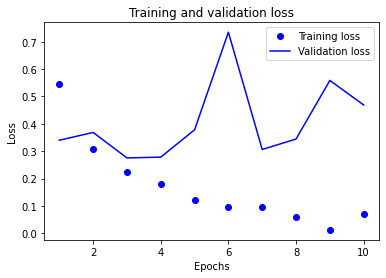

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

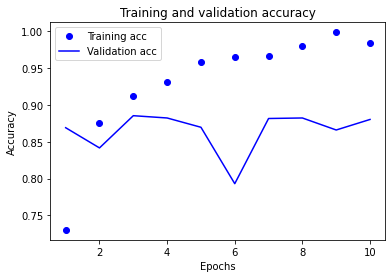

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
results

### Adding Dropout and Regularization techniques

In [ ]:
from keras.datasets import imdb
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import numpy as np
from tensorflow.keras import layers
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Convert the IMDB data into binary matrices
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


import random
random.seed(10)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# Define the model architecture
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.0002),
                 activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.0002),
                 activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', verbose=1, mode='min')
history = model.fit(x_train, 
                    y_train,
                    epochs=20, 
                    batch_size=512,
                    validation_data=(x_val,y_val),
                    
                    callbacks=[early_stop])



                    

# Evaluate the model on the test data
results = model.evaluate(x_test, y_test)


Epoch 1/20
49/49 [==============================] - 3s 39ms/step - loss: 0.5324 - accuracy: 0.7527 - val_loss: 0.3335 - val_accuracy: 0.8980
Epoch 2/20
49/49 [==============================] - 3s 71ms/step - loss: 0.3572 - accuracy: 0.8723 - val_loss: 0.2572 - val_accuracy: 0.9107
Epoch 2: early stopping
782/782 [==============================] - 5s 7ms/step - loss: 0.3181 - accuracy: 0.8784
